In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
# Extract the datasets
data_root = '/Users/rgparekh/Documents/Personal/Rajesh/Data/' # Change me to store data elsewhere
train_filename = 'notMNIST_large.tar.gz'
test_filename = 'notMNIST_small.tar.gz'
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(data_root + train_filename)
test_folders = maybe_extract(data_root + test_filename)

/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large already present - Skipping extraction of /Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large.tar.gz.
['/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/A', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/B', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/C', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/D', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/E', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/F', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/G', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/H', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/I', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/J']
/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_small already present - Skipping extraction of /Users/rgparekh/Documents/Personal/Rajesh/Data/notMNI

In [3]:
# Display some images
for folder in train_folders:
    print(folder)
    file_list = os.listdir(folder)
    print(len(file_list))
    # Print every 10,000th filename
    for index, file_name in enumerate(file_list, start=0):
        if (index % 25000 == 0):
            print(file_name)
            display(Image(filename=folder + "/" + file_name))
            


/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/A
52912
a29ydW5pc2hpLnR0Zg==.png


SGVhZGxpbmUgQm9sZC50dGY=.png


VlRDR29ibGluSGFuZFNDLnR0Zg==.png


/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/B
52912
a29ydW5pc2hpLnR0Zg==.png


SGVhZGxpbmUgQm9sZC50dGY=.png


VlRDR29ibGluSGFuZFNDLnR0Zg==.png


/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/C
52912
a29ydW5pc2hpLnR0Zg==.png


SGVhZGxpbmUgQm9sZC50dGY=.png


VlRDR29ibGluSGFuZFNDLnR0Zg==.png


/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/D
52912
a29ydW5pc2hpLnR0Zg==.png


SGVhZGxpbmUgQm9sZC50dGY=.png


VlRDR29ibGluSGFuZFNDLnR0Zg==.png


/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/E
52912
a29ydW5pc2hpLnR0Zg==.png


SGVhZGxpbmUgQm9sZC50dGY=.png


VlRDR29ibGluSGFuZFNDLnR0Zg==.png


/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/F
52912
a29ydW5pc2hpLnR0Zg==.png


SGVhZGxpbmUgQm9sZC50dGY=.png


VlRDR29ibGluSGFuZFNDLnR0Zg==.png


/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/G
52912
a29ydW5pc2hpLnR0Zg==.png


SGVhZGxpbmUgQm9sZC50dGY=.png


VlRDR29ibGluSGFuZFNDLnR0Zg==.png


/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/H
52912
a29ydW5pc2hpLnR0Zg==.png


SGVhZGxpbmUgQm9sZC50dGY=.png


VlRDR29ibGluSGFuZFNDLnR0Zg==.png


/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/I
52912
a29ydW5pc2hpLnR0Zg==.png


SGVhZGxpbmUgQm9sZC50dGY=.png


VlRDR29ibGluSGFuZFNDLnR0Zg==.png


/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/J
52911
a29ydW5pc2hpLnR0Zg==.png


SGVhZGxpbmUgQm9sZC50dGY=.png


VlRDS29taXhhdGlvbkhhbmQudHRm.png


In [4]:
# Load data in a more manageable format and save it to disk
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/A.pickle already present - Skipping pickling.
/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/B.pickle already present - Skipping pickling.
/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/C.pickle already present - Skipping pickling.
/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/D.pickle already present - Skipping pickling.
/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/E.pickle already present - Skipping pickling.
/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/F.pickle already present - Skipping pickling.
/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/G.pickle already present - Skipping pickling.
/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/H.pickle already present - Skipping pickling.
/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/I.pickle already present - Skipping pickling.
/Users/rgparekh/Documents/Pe

['/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/A.pickle', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/B.pickle', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/C.pickle', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/D.pickle', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/E.pickle', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/F.pickle', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/G.pickle', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/H.pickle', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/I.pickle', '/Users/rgparekh/Documents/Personal/Rajesh/Data/notMNIST_large/J.pickle']


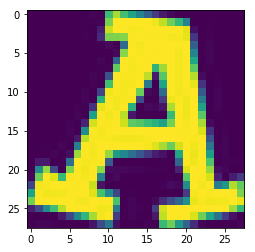

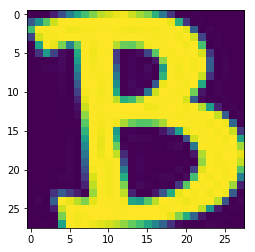

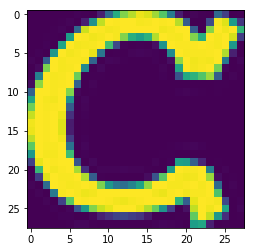

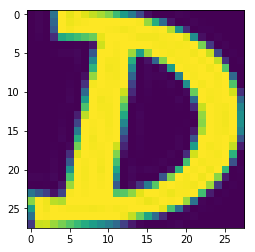

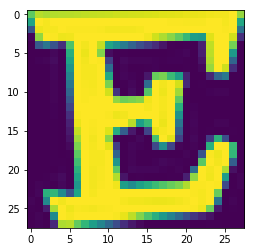

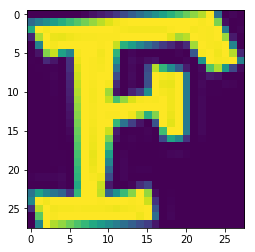

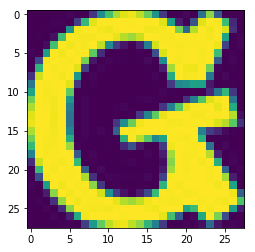

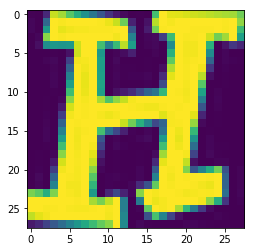

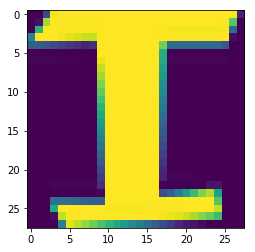

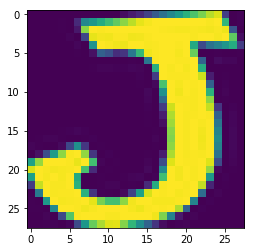

In [5]:
# Print a few images from this modified dataset (ndarray)
print(train_datasets)

# Display a sample of images using matplotlib.pyplot
#for label, pickle_file in enumerate(train_datasets):
#    print(label)
#    print(pickle_file)
    
for label, pickle_file in enumerate(train_datasets):       
    try:
        with open(pickle_file, 'rb') as f:
            letter_set = pickle.load(f)
            letter = letter_set[1000,:,:]
            plt.imshow(letter)
            plt.show()            
    except Exception as e:
        print('Unable to process data from', pickle_file, ':', e)
        raise
        

In [6]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [7]:
# Re-shuffle the datasets
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

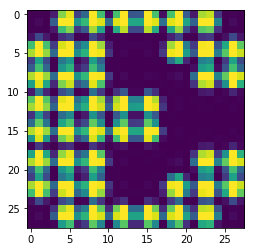

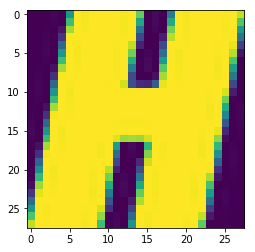

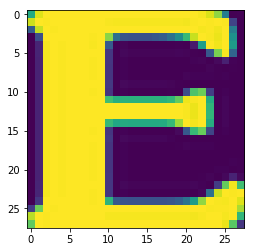

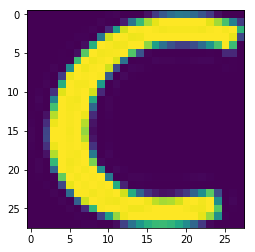

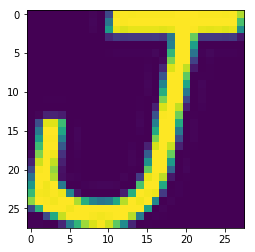

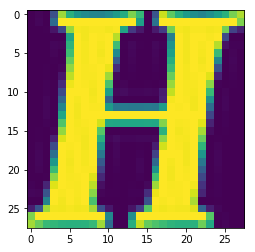

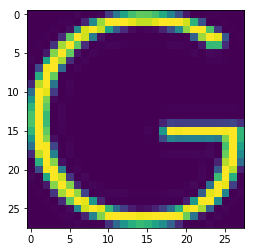

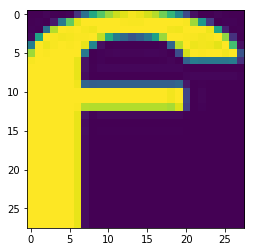

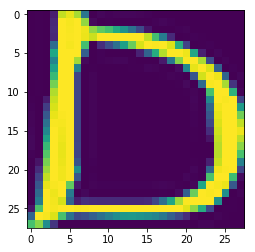

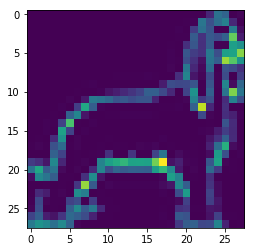

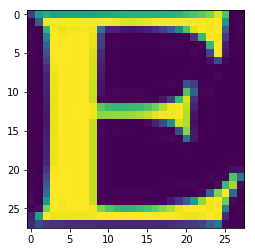

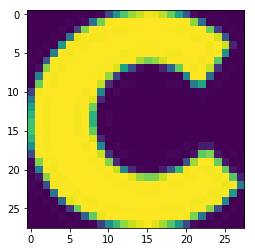

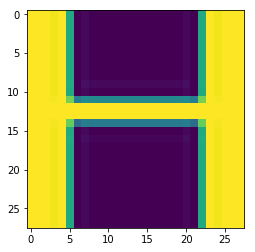

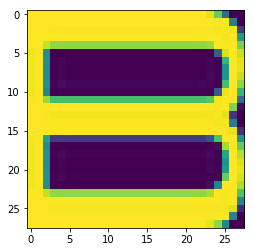

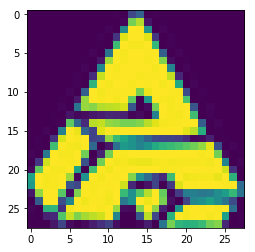

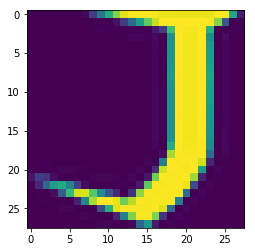

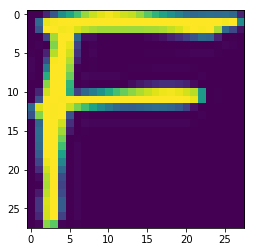

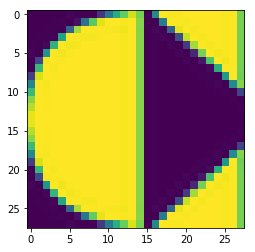

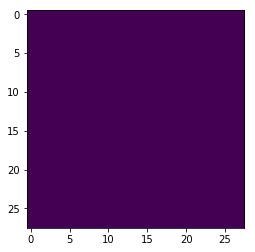

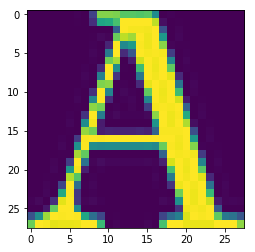

In [8]:
# Verify that the re-shuffled datasets still look good
for index, train_data_element in enumerate(train_dataset):
    if (index%10000 == 0):
        plt.imshow(train_data_element)
        plt.show()
        

In [9]:
# Save the files for later use
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [10]:
# Compress the file
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800503


In [11]:
a = np.array([[2,3,4],[5,6,7]])
b = np.array([[2,3,4],[5,6,7]])
print(a)
print(b)
print(np.array_equal(a,b))


[[2 3 4]
 [5 6 7]]
[[2 3 4]
 [5 6 7]]
True


In [15]:
# Determine overlap between train and validation set
# Determine overlap between train and test set
# Credit: http://www.ritchieng.com/machine-learning/deep-learning/tensorflow/notmnist/

import time

def check_overlaps(images1, images2):
    start = time.clock()
    hash1 = set([hash(image1.tobytes()) for image1 in images1])
    hash2 = set([hash(image2.tobytes()) for image2 in images2])
    all_overlaps = set.intersection(hash1, hash2)
    return all_overlaps, time.clock()-start

r, execTime = check_overlaps(train_dataset, test_dataset)    
print('Number of overlaps between training and test sets: {}. Execution time: {}.'.format(len(r), execTime))

r, execTime = check_overlaps(train_dataset, valid_dataset)   
print('Number of overlaps between training and validation sets: {}. Execution time: {}.'.format(len(r), execTime))

r, execTime = check_overlaps(valid_dataset, test_dataset) 
print('Number of overlaps between validation and test sets: {}. Execution time: {}.'.format(len(r), execTime))

Number of overlaps between training and test sets: 1153. Execution time: 1.158169000000271.
Number of overlaps between training and validation sets: 953. Execution time: 0.42782399999850895.
Number of overlaps between validation and test sets: 55. Execution time: 0.04098900000099093.


In [18]:
# Train a logistic regression classifier with varying test set data sizes
ntrain, train_w, train_h = train_dataset.shape
nvalid, valid_w, valid_h = valid_dataset.shape
ntest, test_w, test_h = test_dataset.shape


In [28]:
# Reshape the datasets as scikit-learn expects a 2d array of training and test instances

training_instances = ntrain

Xtrain = train_dataset.reshape(ntrain, train_w*train_h)[:training_instances]
ytrain = train_labels[:training_instances]

Xvalid = valid_dataset.reshape(nvalid, valid_w*valid_h)
yvalid = valid_labels

Xtest = test_dataset.reshape(ntest, test_w*test_h)
ytest = test_labels

In [29]:
# Logistic Regression

lr = LogisticRegression(penalty='l1',
                        C=1.0,
                        random_state = 61,
                        tol=1e-2,
                        solver='saga',
                        max_iter=1000,
                        multi_class='multinomial',
                        verbose=1)

start = time.clock()
lr.fit(Xtrain,ytrain)
exectime = time.clock()-start

ypred = lr.predict(Xvalid)

# Score
from sklearn import metrics
accuracy = metrics.accuracy_score(yvalid, ypred)

print('Training set size = {}, accuracy = {}, execution time = {}'.format(training_instances, accuracy, exectime))


convergence after 16 epochs took 267 seconds
Training set size = 200000, accuracy = 0.8319, execution time = 268.5996779999987


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.4min finished
